In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


# Project Goals
To create a model that predicts median house values in Californian districts, given a number of features from these districts

# Get the data

In [8]:
file_name = 'data/raw/housing.csv'
housing_df = pd.read_csv(file_name)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


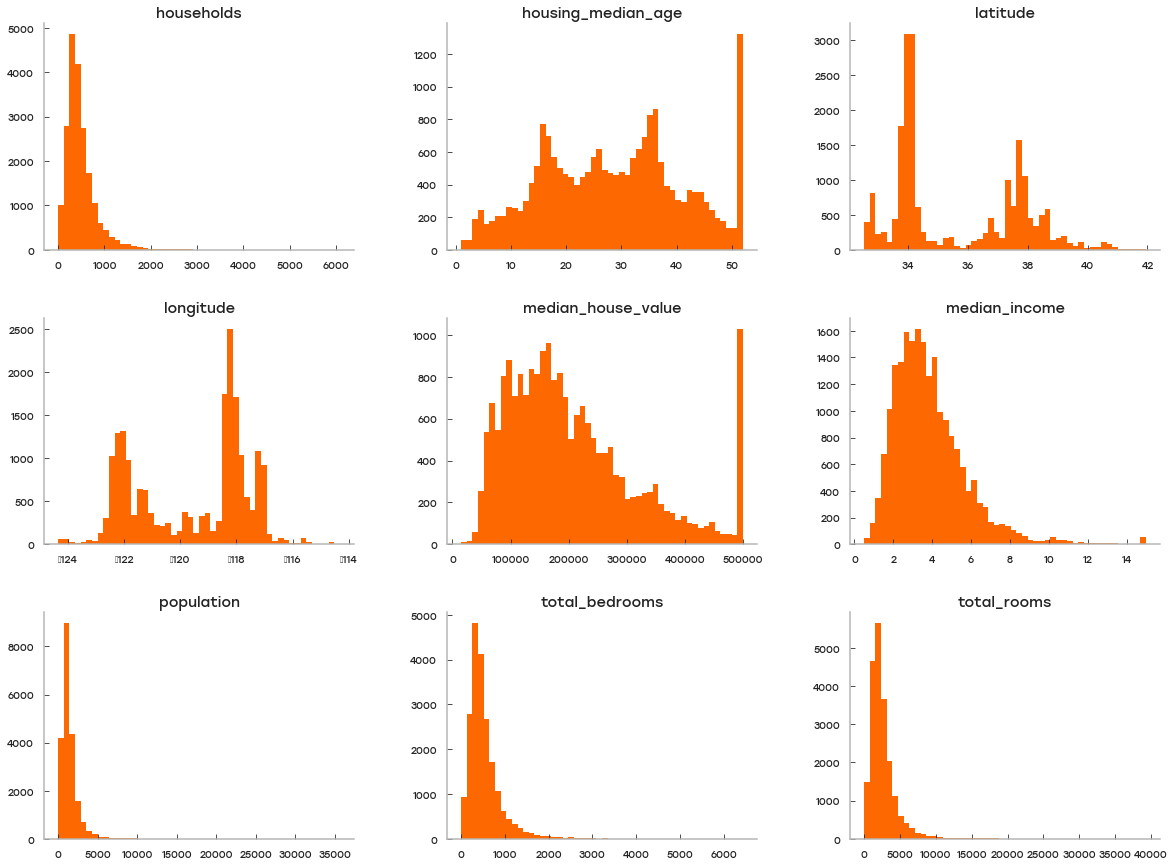

In [15]:
housing_df.hist(bins=50, figsize=(20,15));


## Split the data
Here we create training and test splits

In [19]:
train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=8)

In [20]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17875,-121.99,37.40,35.0,1845.0,325.0,1343.0,317.0,5.3912,235300.0,<1H OCEAN
9360,-122.53,37.95,22.0,7446.0,1979.0,2980.0,1888.0,3.5838,271300.0,NEAR BAY
4338,-118.31,34.08,26.0,1609.0,534.0,1868.0,497.0,2.7038,227100.0,<1H OCEAN
986,-121.85,37.72,43.0,228.0,40.0,83.0,42.0,10.3203,400000.0,INLAND
8129,-118.17,33.80,26.0,1589.0,380.0,883.0,366.0,3.5313,187500.0,NEAR OCEAN


In [21]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15722,-122.46,37.78,47.0,1682.0,379.0,837.0,375.0,5.2806,400000.0,NEAR BAY
19685,-121.61,39.14,44.0,2035.0,476.0,1030.0,453.0,1.4661,65200.0,INLAND
6989,-118.04,33.97,29.0,2376.0,700.0,1968.0,680.0,2.6082,162500.0,<1H OCEAN
5804,-118.25,34.15,13.0,1107.0,479.0,616.0,443.0,0.8185,187500.0,<1H OCEAN
5806,-118.26,34.14,29.0,3431.0,1222.0,4094.0,1205.0,2.2614,248100.0,<1H OCEAN


## reduce the number of categories 

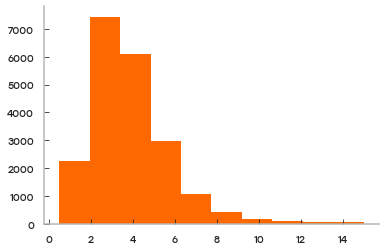

In [26]:
housing_df["median_income"].hist();

In [27]:
# Create income category
# Divide by 1.5 to limit the number of income categories
housing_df["income_cat"] = np.ceil(housing_df["median_income"] / 1.5)
# Label those above 5 as 5
housing_df["income_cat"].where(housing_df["income_cat"] < 5, 5.0, inplace=True)

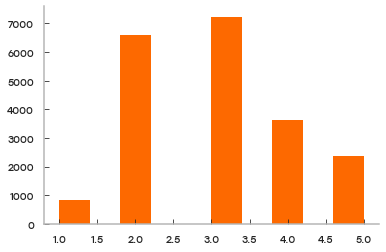

In [28]:
# plot histogram for new category 
housing_df["income_cat"].hist();

In [29]:
housing_df["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

From the above histogram we see the data is not evenly split. We stratify in order to properly represent population with splits. 

## Stratify data

In [31]:
# split data again but this time with strata
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df, housing_df["income_cat"]):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]

In [32]:
# strata ratios 
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [33]:
# compared to original population 
housing_df["income_cat"].value_counts() / len(housing_df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [35]:
# Now we can drop the income cat column 
for df in [strat_train_set, strat_test_set]:
    df.drop("income_cat", axis=1, inplace=True)

In [38]:
# Save the strata sets
strata = [strat_train_set, strat_test_set]
names = ['strat_train_set', 'strat_test_set']
for df, name in zip(strata, names):
    df.to_pickle(name+'.pkl')

# Explore data (gain insights)

# Prepare data

# Explore models

# Fine tune model


# Present solution

# Launch monitor and maintain system